In [1]:
import sys
import os 
# current working directory
path = os.getcwd()
# parent directory
parent = os.path.join(path, os.pardir)
sys.path.append(os.path.abspath(parent))
from bayes_opt1 import BayesianOptimization
from bayes_opt1 import UtilityFunction
from plot_gp_function import plot_gp
import numpy as np

import matplotlib.pyplot as plt
from matplotlib import gridspec
%matplotlib inline

from scipy.stats import norm
from scipy.optimize import minimize
from plot_gp_function import plot_convergence
from plot_gp_function import plot_simple_regret

# Comparative analysis on acquisition functions

In [2]:
xx = np.linspace(-2, 10, 10000).reshape(-1,1)

def target(xx):
    return np.exp(-(xx - 2)**2) + np.exp(-(xx - 6)**2/10) + 1/ (xx**2 + 1) 

params = {'ucb': {'kappa': 5, 'xi': 0}, 'ei': {'kappa': 5, 'xi': 0}, 'poi': {'kappa': 5,'xi': 0.01}}
optimizers = {}
for acq in params.keys():
    optimizers[acq] = BayesianOptimization(target, {'x': (min(xx), max(xx))}, random_state=27)


In [3]:
def update_optimizers(n_iter, optimizers, init_points=2):
    
    if len(list(optimizers.values())[0]._space.target) == 0:
        for acq in optimizers.keys():
            optimizers[acq].maximize(init_points=init_points, n_iter=0, acq=acq)
    else:
        for acq in optimizers.keys():
            optimizers[acq].maximize(init_points=0, n_iter=n_iter, acq=acq)
    return optimizers      

|   iter    |  target   |     x     |
-------------------------------------
|  1        |  0.8198   |  3.109    |
|  2        |  0.746    |  7.775    |
|   iter    |  target   |     x     |
-------------------------------------
|  1        |  0.8198   |  3.109    |
|  2        |  0.746    |  7.775    |
|   iter    |  target   |     x     |
-------------------------------------
|  1        |  0.8198   |  3.109    |
|  2        |  0.746    |  7.775    |


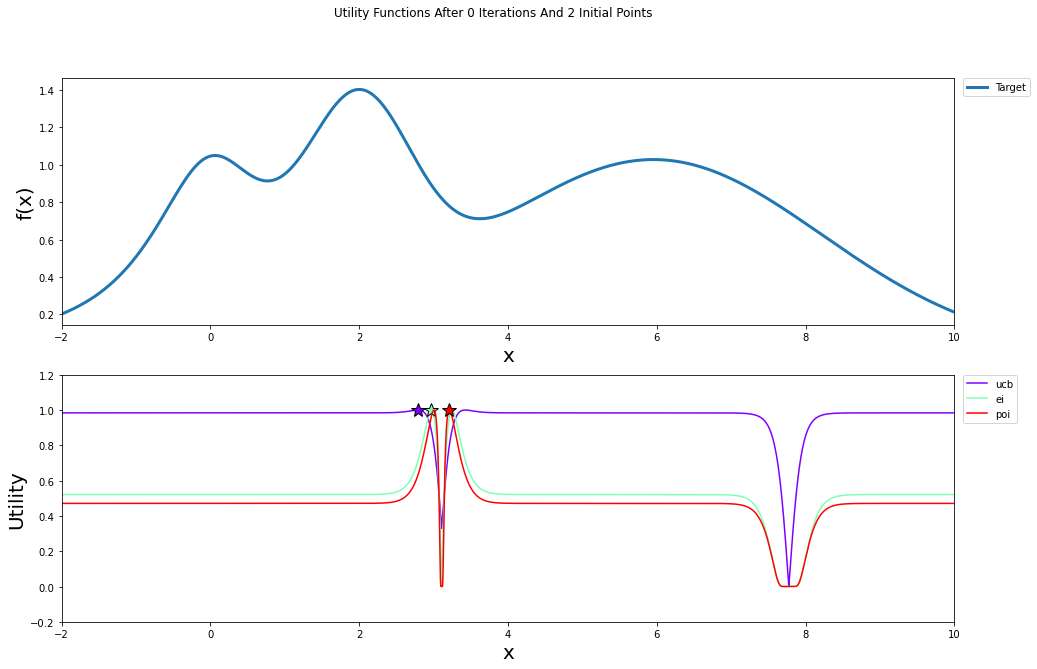

In [4]:
optimizers = update_optimizers(5, optimizers)
plot_gp(optimizers, xx, target, params)

|   iter    |  target   |     x     |
-------------------------------------
|  3        |  0.5234   | -0.9694   |
|  4        |  0.7581   |  4.061    |
|  5        |  0.2118   |  10.0     |
|  6        |  1.022    |  6.177    |
|  7        |  1.165    |  1.414    |
|   iter    |  target   |     x     |
-------------------------------------
|  3        |  0.5234   | -0.9694   |
|  4        |  0.7581   |  4.061    |
|  5        |  1.331    |  2.293    |
|  6        |  0.7239   |  3.834    |
|  7        |  1.402    |  1.999    |
|   iter    |  target   |     x     |
-------------------------------------
|  3        |  0.5234   | -0.9694   |
|  4        |  0.7581   |  4.061    |
|  5        |  0.8234   |  3.101    |
|  6        |  0.8255   |  3.096    |
|  7        |  0.8293   |  3.088    |


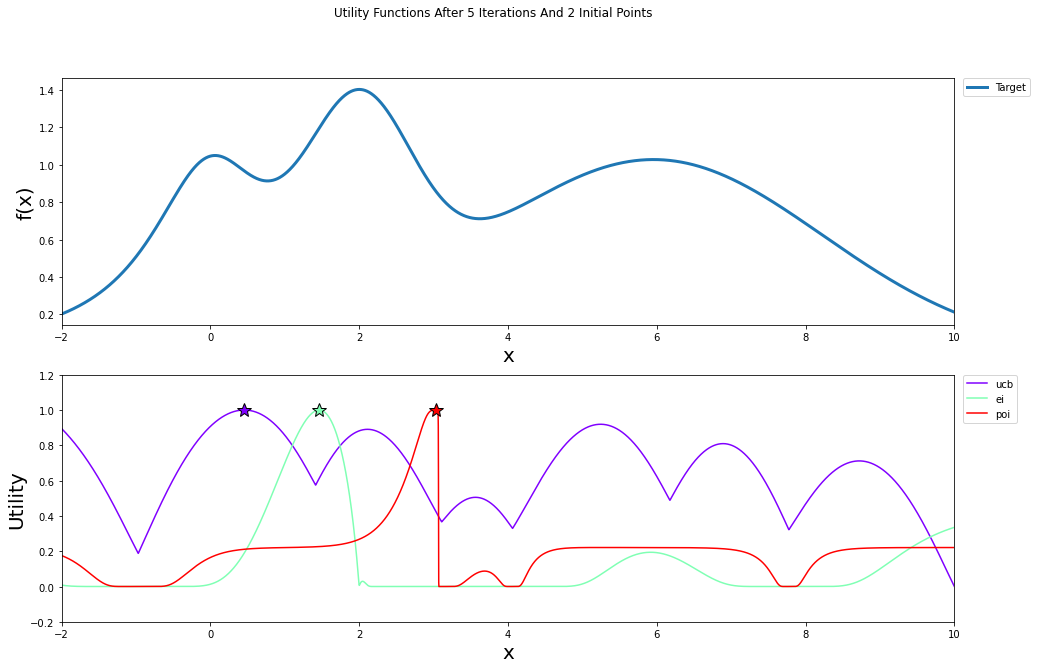

In [5]:
optimizers = update_optimizers(5, optimizers)
plot_gp(optimizers, xx, target, params)

|   iter    |  target   |     x     |
-------------------------------------
|  8        |  0.9208   |  0.6565   |
|  9        |  1.402    |  2.016    |
|  10       |  0.982    |  5.263    |
|  11       |  1.318    |  2.319    |
|  12       |  1.39     |  1.883    |
|   iter    |  target   |     x     |
-------------------------------------
|  8        |  1.195    |  1.462    |
|  9        |  0.2119   |  10.0     |
|  10       |  1.027    |  5.991    |
|  11       |  1.4      |  2.042    |
|  12       |  0.202    | -1.998    |
|   iter    |  target   |     x     |
-------------------------------------
|  8        |  0.847    |  3.052    |
|  9        |  0.8664   |  3.015    |
|  10       |  0.8696   |  3.009    |
|  11       |  0.9036   |  2.949    |
|  12       |  0.9539   |  2.868    |


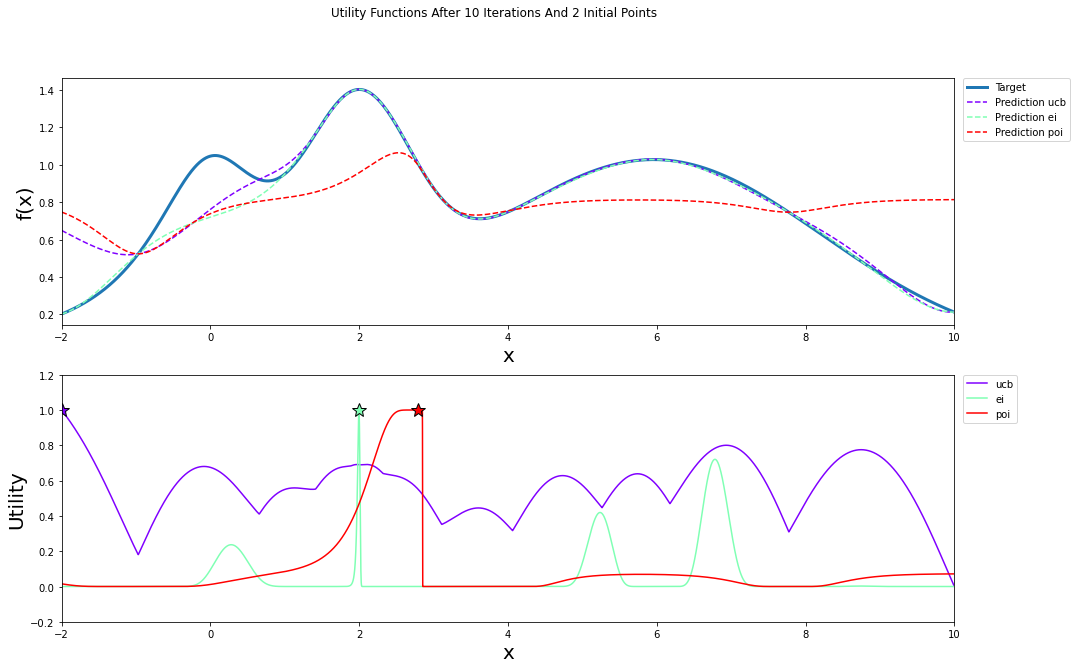

In [6]:
optimizers_list = update_optimizers(5, optimizers_list)
plot_gp(optimizers_list, xx, target, params)

|   iter    |  target   |     x     |
-------------------------------------
|  8        |  0.9208   |  0.6565   |
|  9        |  1.402    |  2.016    |
|  10       |  0.982    |  5.263    |
|  11       |  1.318    |  2.319    |
|  12       |  1.39     |  1.883    |
|   iter    |  target   |     x     |
-------------------------------------
|  8        |  1.195    |  1.462    |
|  9        |  0.2119   |  10.0     |
|  10       |  1.027    |  5.991    |
|  11       |  1.4      |  2.042    |
|  12       |  0.202    | -1.998    |
|   iter    |  target   |     x     |
-------------------------------------
|  8        |  0.847    |  3.052    |
|  9        |  0.8664   |  3.015    |
|  10       |  0.8696   |  3.009    |
|  11       |  0.9036   |  2.949    |
|  12       |  0.9539   |  2.868    |


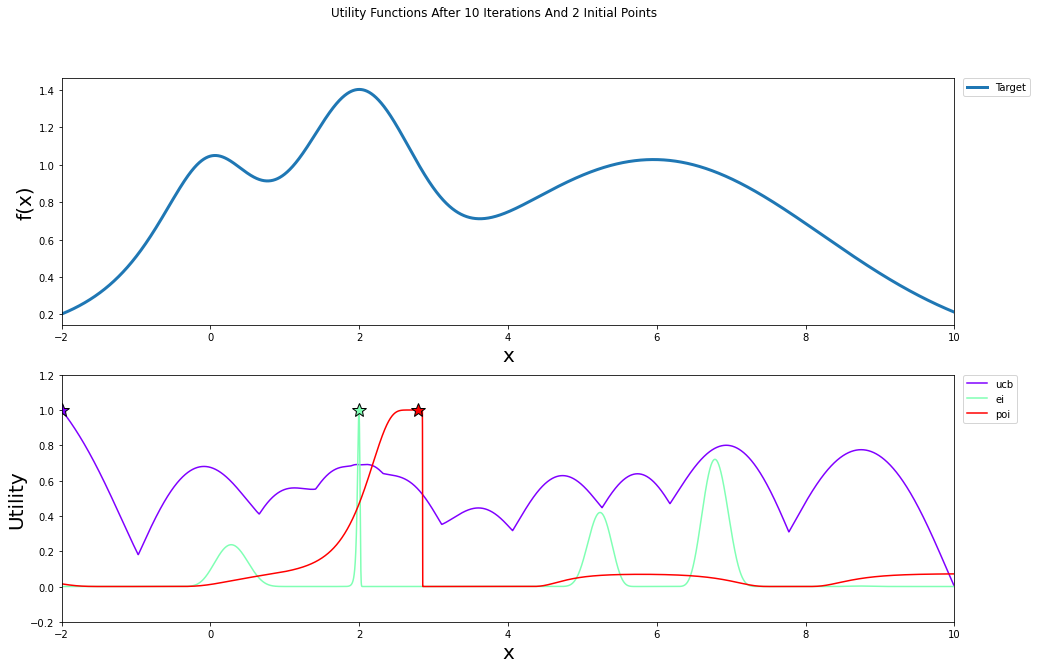

In [6]:
optimizers = update_optimizers(5, optimizers)
plot_gp(optimizers, xx, target, params)

|   iter    |  target   |     x     |
-------------------------------------
|  13       |  1.401    |  1.979    |
|  14       |  1.402    |  2.003    |
|  15       |  1.402    |  1.997    |
|  16       |  1.402    |  2.015    |
|  17       |  1.402    |  1.993    |
|   iter    |  target   |     x     |
-------------------------------------
|  13       |  1.402    |  1.996    |
|  14       |  0.9618   |  6.783    |
|  15       |  1.402    |  1.999    |
|  16       |  1.402    |  2.001    |
|  17       |  1.402    |  1.999    |
|   iter    |  target   |     x     |
-------------------------------------
|  13       |  0.9699   |  2.844    |
|  14       |  0.9935   |  2.809    |
|  15       |  1.131    |  2.614    |
|  16       |  1.14     |  2.602    |
|  17       |  1.165    |  2.567    |


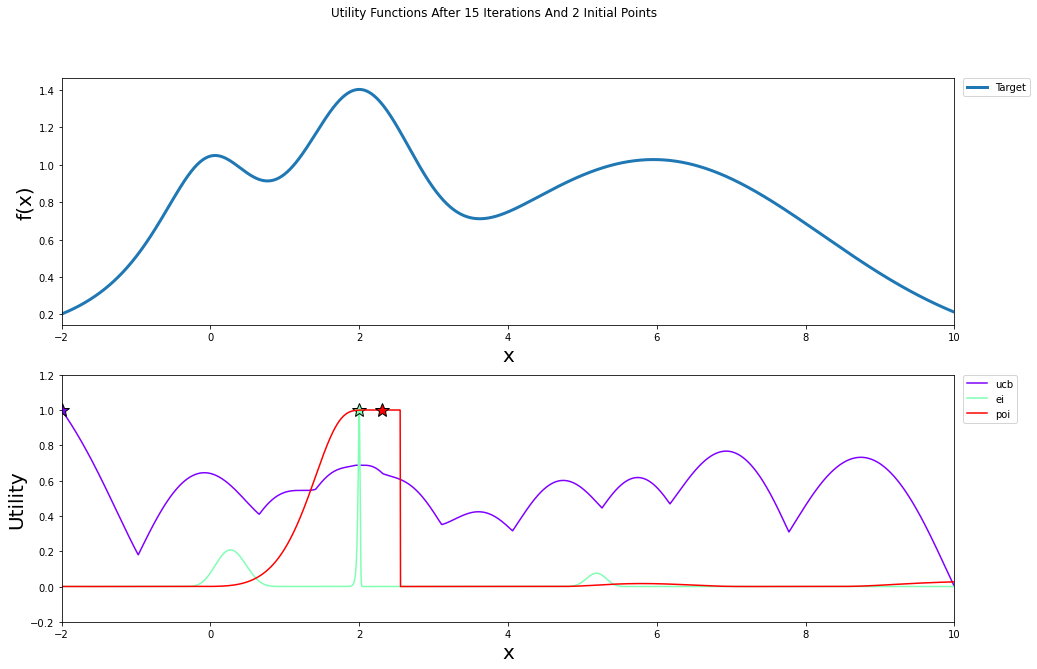

In [7]:
optimizers = update_optimizers(5, optimizers)
plot_gp(optimizers, xx, target, params)

# Plot convergences

|   iter    |  target   |     x     |
-------------------------------------
|  1        |  0.8198   |  3.109    |
|  2        |  0.746    |  7.775    |
|   iter    |  target   |     x     |
-------------------------------------
|  1        |  0.8198   |  3.109    |
|  2        |  0.746    |  7.775    |
|   iter    |  target   |     x     |
-------------------------------------
|  1        |  0.8198   |  3.109    |
|  2        |  0.746    |  7.775    |
|  3        |  0.7247   |  3.428    |
|  4        |  1.026    |  5.855    |
|  5        |  1.027    |  5.893    |
|  6        |  1.225    |  1.51     |
|  7        |  1.049    |  0.07432  |
|  8        |  0.2017   | -2.0      |
|  9        |  0.2118   |  10.0     |
|  10       |  0.9166   |  0.8415   |
|  11       |  0.8849   |  4.682    |
|  12       |  1.373    |  2.183    |
|  13       |  0.6399   | -0.7678   |
|  14       |  0.9439   |  6.893    |
|  15       |  0.4743   |  8.781    |
|  16       |  1.393    |  1.902    |
|  17       

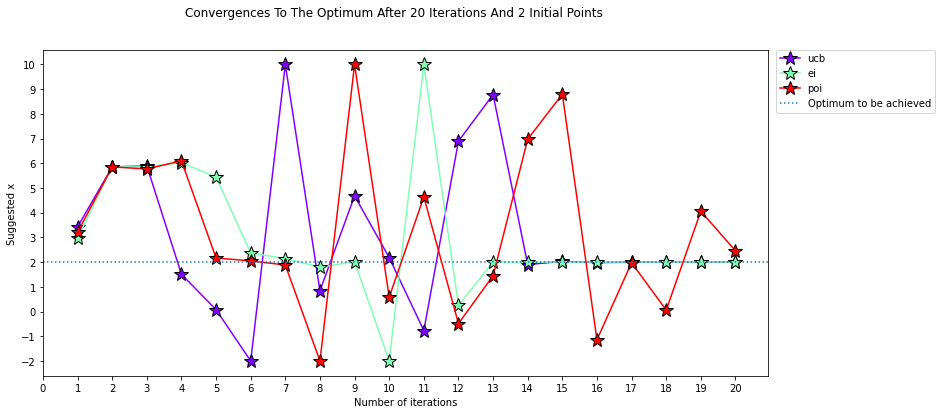

In [9]:
optimizer1 = BayesianOptimization(target, {'x': (min(xx), max(xx))}, random_state=27)
optimizer2 = BayesianOptimization(target, {'x': (min(xx), max(xx))}, random_state=27)
optimizer3 = BayesianOptimization(target, {'x': (min(xx), max(xx))}, random_state=27)
optimizer1.maximize(init_points=2, n_iter=0, kappa=1.5)
optimizer2.maximize(init_points=2, n_iter=0,acq='ei')
optimizer3.maximize(init_points=2, n_iter=0,acq='poi')
optimizers={'ucb': optimizer1, 'ei': optimizer2, 'poi': optimizer3}
plot_convergence(optimizers, xx, target, params)

# Plot of the simple regret 

|   iter    |  target   |     x     |
-------------------------------------
|  1        |  0.8198   |  3.109    |
|  2        |  0.746    |  7.775    |
|   iter    |  target   |     x     |
-------------------------------------
|  1        |  0.8198   |  3.109    |
|  2        |  0.746    |  7.775    |
|   iter    |  target   |     x     |
-------------------------------------
|  1        |  0.8198   |  3.109    |
|  2        |  0.746    |  7.775    |
|  3        |  0.7247   |  3.428    |
|  3        |  0.89     |  2.972    |
|  3        |  0.7785   |  3.211    |
|  4        |  1.026    |  5.855    |
|  4        |  1.026    |  5.855    |
|  4        |  1.026    |  5.855    |
|  5        |  1.027    |  5.893    |
|  5        |  1.026    |  5.855    |
|  5        |  1.024    |  5.77     |
|  6        |  1.225    |  1.51     |
|  6        |  1.027    |  6.02     |
|  6        |  1.025    |  6.1      |
|  7        |  1.049    |  0.07432  |
|  7        |  1.002    |  5.441    |
|  7        

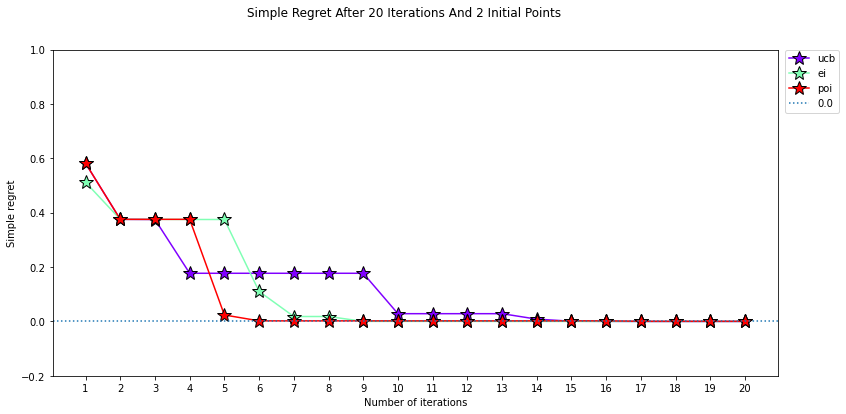

In [10]:
optimizer1 = BayesianOptimization(target, {'x': (min(xx), max(xx))}, random_state=27)
optimizer2 = BayesianOptimization(target, {'x': (min(xx), max(xx))}, random_state=27)
optimizer3 = BayesianOptimization(target, {'x': (min(xx), max(xx))}, random_state=27)
optimizer1.maximize(init_points=2, n_iter=0, kappa=1.5)
optimizer2.maximize(init_points=2, n_iter=0,acq='ei')
optimizer3.maximize(init_points=2, n_iter=0,acq='poi')
optimizers={'ucb': optimizer1, 'ei': optimizer2, 'poi': optimizer3}
plot_simple_regret(optimizers, xx, target, params, dim=1)

# Objective function affected by noise

In [11]:
xx = np.linspace(-2, 10, 10000).reshape(-1,1)

def target(xx):
    return np.exp(-(xx - 2)**2) + np.exp(-(xx - 6)**2/10) + 1/ (xx**2 + 1)  

optimizerNoise = BayesianOptimization(target, {'x': (min(xx), max(xx))}, random_state=27, noise = 0.5)

In [12]:
optimizerNoise.maximize(init_points=2, n_iter=0, kappa=5)

|   iter    |  target   |     x     |
-------------------------------------
|  1        |  1.162    |  3.109    |
|  2        |  0.5809   |  7.775    |


In [13]:
optimizerNoise.maximize(init_points=0, n_iter=3, kappa=5)

|   iter    |  target   |     x     |
-------------------------------------
|  3        |  0.1272   |  3.428    |
|  4        |  1.214    |  5.855    |
|  5        |  1.172    |  5.855    |


# Multidimensional regret

|   iter    |  target   |     x     |     y     |
-------------------------------------------------
|  1        |  0.7862   | -0.3319   |  1.322    |
|  2        | -7.777    | -2.0      | -1.186    |
|   iter    |  target   |     x     |     y     |
-------------------------------------------------
|  1        |  0.7862   | -0.3319   |  1.322    |
|  2        | -7.777    | -2.0      | -1.186    |
|   iter    |  target   |     x     |     y     |
-------------------------------------------------
|  1        |  0.7862   | -0.3319   |  1.322    |
|  2        | -7.777    | -2.0      | -1.186    |
|  3        |  0.8964   | -0.2922   |  1.135    |
|  3        |  0.688    | -0.3552   |  1.431    |
|  3        |  0.7783   | -0.3522   |  1.313    |
|  4        | -3.042    |  2.0      |  1.205    |
|  4        | -0.002417 |  0.9869   |  1.169    |
|  4        |  0.7982   | -0.2648   |  1.363    |
|  5        | -7.0      | -2.0      |  3.0      |
|  5        | -7.153    |  2.0      | -1.038    |


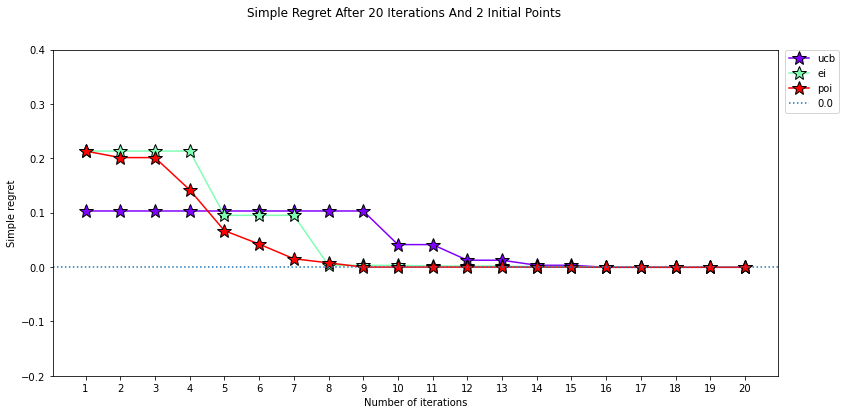

In [2]:
def grid_construction(pbounds, n_grid):

    dim = pbounds.shape[0]
    init = [] #[np.zeros(n_grid)] * dim

    for i in range(dim):
        init.append(np.linspace(pbounds[i,0], pbounds[i,1], n_grid)) #= np.linspace(pbounds[i,0], pbounds[i,1], n_grid) # works \forall p



    grid = np.meshgrid(*init) # list with p matrices n_grid x n_grid
    for g in range(len(grid)):
        grid[g] = grid[g].reshape(-1,1)
    grid = np.stack(grid, axis = -1)
    grid=grid[:,0,:] # array of shape (n_grid*n_grid, p): each row is composed of one element from init[0] and one element from init[1]
    return grid



def black_box_function(x, y):
    return -x ** 2 - (y - 1) ** 2 + 1


optimizer1 = BayesianOptimization(
    f_temp=black_box_function,
    pbounds={'x': (-2, 2), 'y': (-3, 3)},
    verbose=2,
    random_state=1,
    )
optimizer2  = BayesianOptimization(
    f_temp=black_box_function,
    pbounds={'x': (-2, 2), 'y': (-3, 3)},
    verbose=2,
    random_state=1,
    )
optimizer3 = BayesianOptimization(
    f_temp=black_box_function,
    pbounds={'x': (-2, 2), 'y': (-3, 3)},
    verbose=2,
    random_state=1,
    )

grid = grid_construction(optimizer1._space.bounds, 100) # PAY ATTENTION: the density of the grid influences the result of the regret
                                                        # Remember to take enough points

optimizer1.maximize(init_points=2, n_iter=0, kappa=2.5)
optimizer2.maximize(init_points=2, n_iter=0,acq='ei')
optimizer3.maximize(init_points=2, n_iter=0,acq='poi')
optimizers={'ucb': optimizer1, 'ei': optimizer2, 'poi': optimizer3}

params = {'ucb': {'kappa': 2.5, 'xi': 0}, 'ei': {'kappa': 5, 'xi': 0}, 'poi': {'kappa': 5,'xi': 0.01}}
plot_simple_regret(optimizers, grid, black_box_function, params, dim=2)
